In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from gplearn.genetic import SymbolicRegressor

In [3]:
def change(data):
    if data=="<31":
        return 31
    else :
        return int(data)

In [4]:
montrealBikeLane = pd.read_csv("datasets/MontrealBikeLane.csv")
weatherInfo = pd.read_csv("datasets/WeatherInfo.csv")

In [5]:
montrealBikeLane.rename(columns = {'Date':'date_time'}, inplace = True)
weatherInfo.rename(columns = {'Date/Time':'date_time'}, inplace = True)

<Axes: >

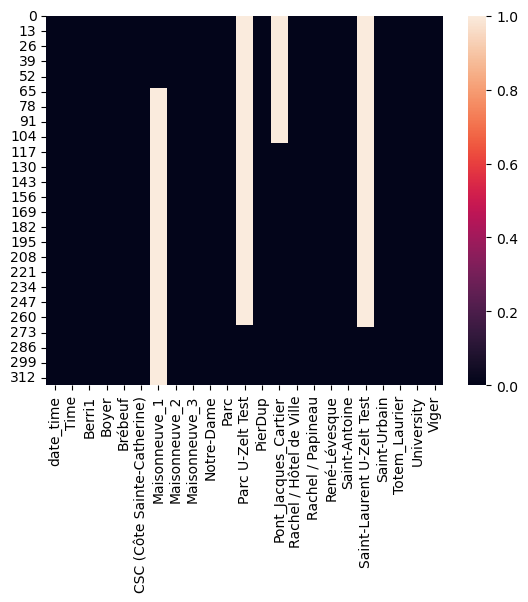

In [6]:
sns.heatmap(montrealBikeLane.isnull())

In [7]:
montrealBikeLane['date_time'] = pd.to_datetime(montrealBikeLane['date_time'], format='%d/%m/%Y').dt.strftime('%d-%m-%Y')
weatherInfo['date_time'] = pd.to_datetime(weatherInfo['date_time'], format='%Y/%m/%d').dt.strftime('%d-%m-%Y')

In [8]:
montrealBikeLane.fillna(0, inplace=True)
output1 = pd.merge(montrealBikeLane, weatherInfo, on='date_time', how='inner')

In [9]:
columns_to_remove = ['Max Temp Flag', 'Min Temp Flag', 'Mean Temp Flag', 'Heat Deg Days Flag','Cool Deg Days Flag','Total Rain Flag','Snow on Grnd Flag','Time', 'Data Quality', 'Dir of Max Gust Flag', 'Spd of Max Gust Flag', 'Year','Month', 'Day','Heat Deg Days (°C)', 'Cool Deg Days (°C)', 'Total Snow Flag','Total Precip Flag','Max Temp (°C)', 'Min Temp (°C)','Dir of Max Gust (10s deg)']

In [10]:
output1.drop(columns_to_remove, inplace=True, axis=1)

In [11]:
output1['Total Rain (mm)'].fillna(0, inplace=True)
output1['Total Snow (cm)'].fillna(0, inplace=True)
output1['Total Precip (mm)'].fillna(0, inplace=True)
output1['Snow on Grnd (cm)'].fillna(0, inplace=True)
output1['Spd of Max Gust (km/h)'].fillna(31, inplace=True)

In [12]:
output1["Spd of Max Gust (km/h)"]=output1["Spd of Max Gust (km/h)"].apply(change)

In [13]:
print(output1)

      date_time  Berri1  Boyer  Brébeuf  CSC (Côte Sainte-Catherine)  \
0    01-01-2015      58     12        4                           17   
1    02-01-2015      75      7        5                           15   
2    03-01-2015      79      7        3                            7   
3    04-01-2015      10      1       21                            0   
4    05-01-2015      42      0        2                            0   
..          ...     ...    ...      ...                          ...   
314  11-11-2015    3044   1931     2828                         1393   
315  12-11-2015    1751    930     1670                          888   
316  13-11-2015    1818    906     1711                          873   
317  14-11-2015     979    759      978                          322   
318  15-11-2015     913    749     1028                          348   

     Maisonneuve_1  Maisonneuve_2  Maisonneuve_3  Notre-Dame  Parc  ...  \
0             33.0             49             21          16

In [14]:
output1.to_csv('filled_dataset.csv', index=False)

In [15]:
val=[]
for i in range(len(output1)):
    val.append(output1.iloc[i,2:23].values.sum())

In [16]:
output1["total"]=val
print(output1["total"])

0        467.7
1        720.2
2        681.9
3        145.2
4        317.4
        ...   
314    37903.4
315    22433.1
316    21518.2
317    12321.0
318    12689.0
Name: total, Length: 319, dtype: float64


In [17]:
X=output1.drop("total",axis=1)
y=output1["total"]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)